1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

In [7]:
df.duplicated().sum()

0

There are no duplicates

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

OR

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
#df.nunique returns the whole dataframe
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [20]:
for i in df.columns:
    print(df[i].name,"->",df[i].unique())


gender -> ['female' 'male']
race/ethnicity -> ['group D' 'group B' 'group C' 'group E' 'group A']
parental level of education -> ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
lunch -> ['standard' 'free/reduced']
test preparation course -> ['completed' 'none']
math score -> [ 59  96  57  70  83  68  82  46  80  74  53  76  55  56  35  87  65  66
  67  89  99  58  90  69  32  86  52  63  62  79  71  61  75  73  64  23
  41  84  85  88  91  51 100  48  98  72  43  50  38  81  47  49  44  60
  93  77  20  78  94  39  42  54  37  45  27  92  95  34  97  31  40  33
  21  25  28  15  24  30  36]
reading score -> [ 70  93  76  85  57  83  61  75  69  50  74  73  54  46  47  92  82  71
  66  88  52  79  87  81  78  35  53  56  77  72  67  64  86  68  34  91
  62  33  58  49  80  89  97  65  51  96  84  90  95  55  60  99  45  63
  98  40  94  59  48  25  39  43  44  27 100  42  30  32  38  41  37]
writing score -> [ 78  87  77  63 

In [22]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


## Insight

The above statistics explains the scores of three subjects - math, reading and writing for 1000 records. 
- While the mean of all three subjects is closer, math having average score of 67, reading with the highest of 70 and writing with average of 69.

- Std deviation also seems to be closer and similar for all three subjects - math showing more variability(15.25) as compared to reading and writing.

- Maximum and minimum score ranging from 15-100 for all three subjects.

- Most scores are ranging from 60-80 as from those 25-50-75%

- This indicates that scores vary widely - some having really low scores while others having higher scores but in general trend most students' scores ranges from middle to higher range (60-80) across all subjects.

# Data Exploration

In [23]:
# we have already checked the categories of different columns above but here another method of checking 
# the categories for categorical columns as such.

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [32]:
print("Categories in gender column ->",df['gender'].unique())

print("Categories in Race/Ethnicity column ->",df['race/ethnicity'].unique())

print("Categories in Parental level of education column ->",df['parental level of education'].unique())

print("Categories in lunch column ->",df['lunch'].unique())

print("Categories in Test Preparation course column ->",df['test preparation course'].unique())



Categories in gender column -> ['female' 'male']
Categories in Race/Ethnicity column -> ['group D' 'group B' 'group C' 'group E' 'group A']
Categories in Parental level of education column -> ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Categories in lunch column -> ['standard' 'free/reduced']
Categories in Test Preparation course column -> ['completed' 'none']


In [39]:
# Defining categorical and numerical features

numerical_features=[i for i in df.columns if df[i].dtype!= 'O']
categorical_features=[i for i in df.columns if df[i].dtype== 'O']

print("There are {} numerical features : {}".format(len(numerical_features),numerical_features))
print("There are {} categorical features : {}".format(len(categorical_features),categorical_features))


There are 3 numerical features : ['math score', 'reading score', 'writing score']
There are 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [41]:
# adding total score and average score column as like target variables or for overall analysis

df['total_score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total_score']/3

df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group D,some college,standard,completed,59,70,78,207,69.0
1,male,group D,associate's degree,standard,none,96,93,87,276,92.0
2,female,group D,some college,free/reduced,none,57,76,77,210,70.0


In [66]:
maths_highest=(df['math score']==100).sum()
reading_highest=df[df['reading score']==100]['average'].count() 
writing_highest=(df['writing score']==100).sum()

print('Number of students with full marks in Maths: ',maths_highest)
print('Number of students with full marks in Reading: ',reading_highest)
print('Number of students with full marks in Writing: ',writing_highest)

# OR
# reading_full = df[df['reading score'] == 100]['average'].count()
# writing_full = df[df['writing score'] == 100]['average'].count()
# math_full = df[df['math score'] == 100]['average'].count()

# print(f'Number of students with full marks in Maths: {math_full}')
# print(f'Number of students with full marks in Writing: {writing_full}')
# print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths:  9
Number of students with full marks in Reading:  10
Number of students with full marks in Writing:  13


In [70]:
maths_less_20=(df['math score']<=20).sum()
reading_less_20=df[df['reading score']<=20]['average'].count() 
writing_less_20=(df['writing score']<=20).sum()

print('Number of students with marks less than 20 in Maths: ',maths_less_20)
print('Number of students with marks less than 20 in Reading: ',reading_less_20)
print('Number of students with marks less than 20 in Writing: ',writing_less_20)


Number of students with marks less than 20 in Maths:  2
Number of students with marks less than 20 in Reading:  0
Number of students with marks less than 20 in Writing:  2


This indicates students have performed well in reading and writing as writing has maximum highest students (13) and 2 students less than 20 while reading has 10 students with highest scores and none less than 20, while students have performed worst in maths as highest scorers are also less i.e (9) with 2 students having less than 20 marks.

# Data Visualization

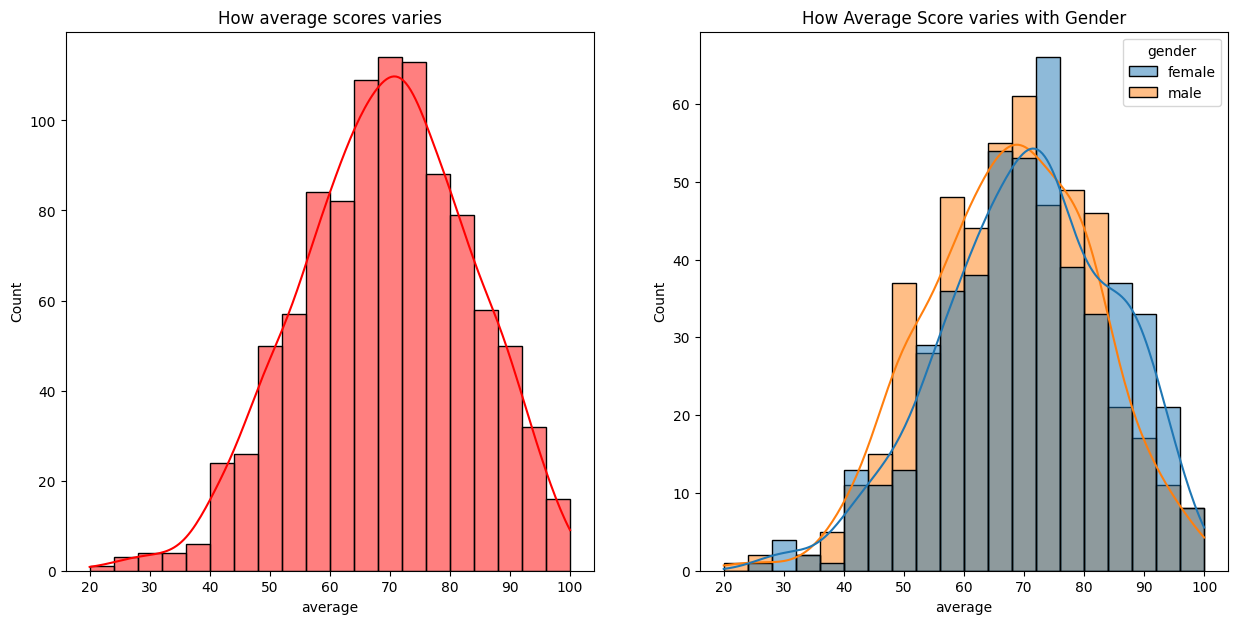

In [92]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=20,kde=True,color='red')
plt.title("How average scores varies")
plt.subplot(122)
sns.histplot(data=df,x=df.average,bins=20, kde=True, hue='gender')
plt.title("How Average Score varies with Gender")
plt.show()

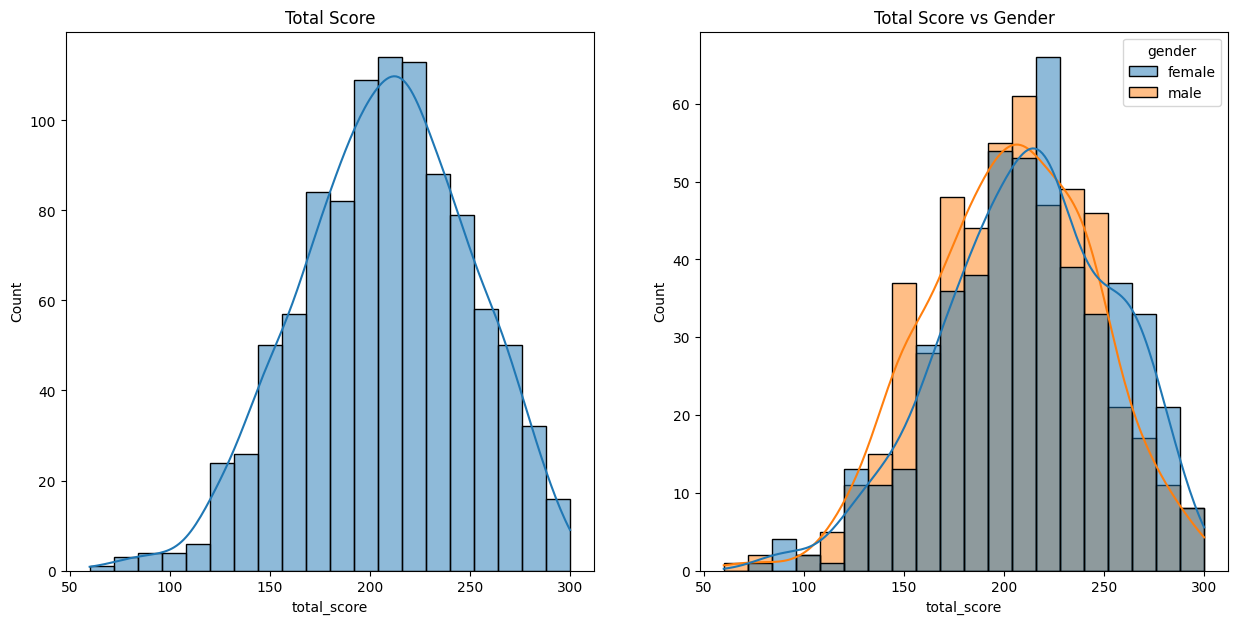

In [94]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score', bins=20, kde=True)
plt.title('Total Score')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=20, kde=True, hue='gender')
plt.title('Total Score vs Gender')
plt.show()

### Insight

- Total score and average score of both male and fenale seems to be almost closer i.e female and male performs almost same in exams


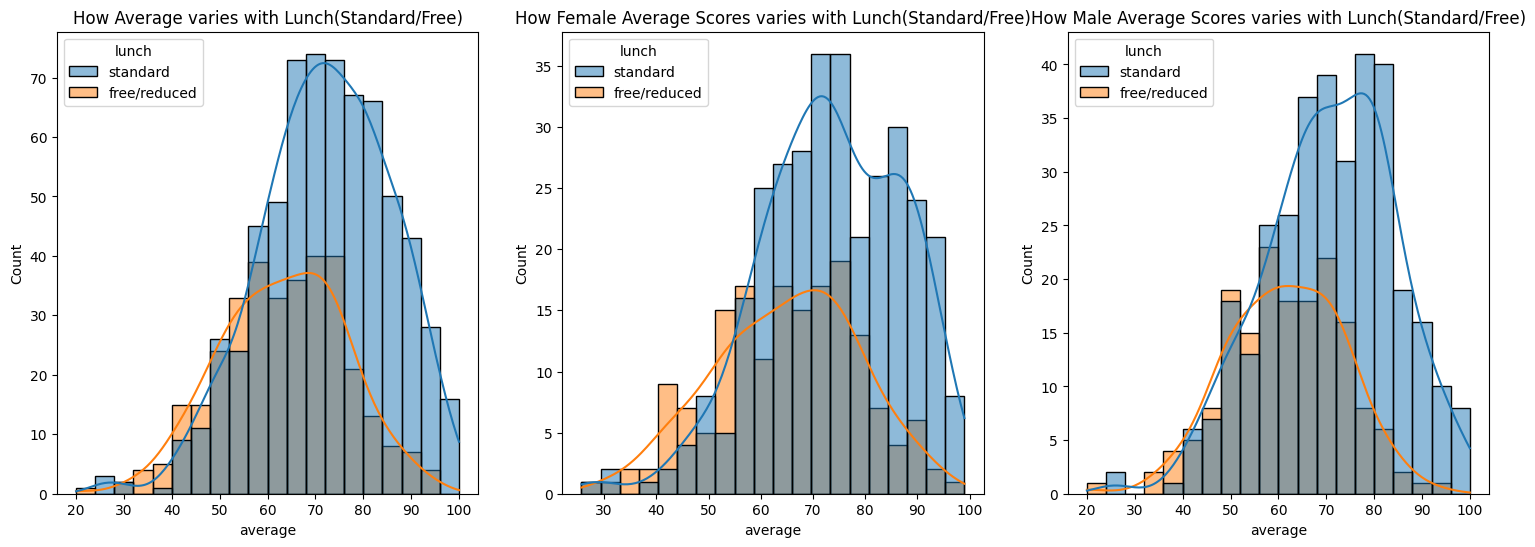

In [114]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, bins=20, hue='lunch')
plt.title("How Average varies with Lunch(Standard/Free)")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', bins=20, kde=True, hue='lunch')
plt.title("How Female Average Scores varies with Lunch(Standard/Free)")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', bins=20, kde=True, hue='lunch')
plt.title("How Male Average Scores varies with Lunch(Standard/Free)")
plt.show()

- Average score is higher for students acquiring Standard Lunch.
- Standard Lunch female and male students perform better as compared to free/reduced lunch students.
- Hence, Standard lunch helps perform well in exams be it female or male.

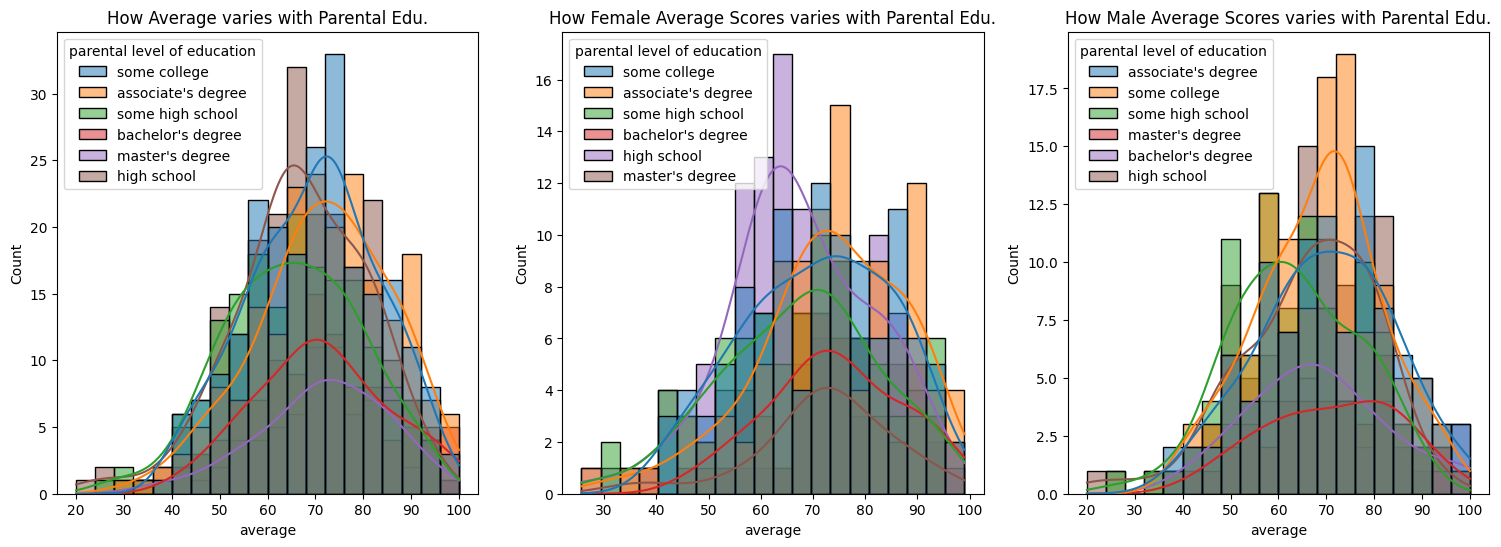

In [120]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, bins=20, hue='parental level of education')
plt.title("How Average varies with Parental Edu.")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', bins=20, kde=True, hue='parental level of education')
plt.title("How Female Average Scores varies with Parental Edu.")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', bins=20, kde=True, hue='parental level of education')
plt.title("How Male Average Scores varies with Parental Edu.")
plt.show()

In general, parental level of education does not help much in performing well in exams for students.

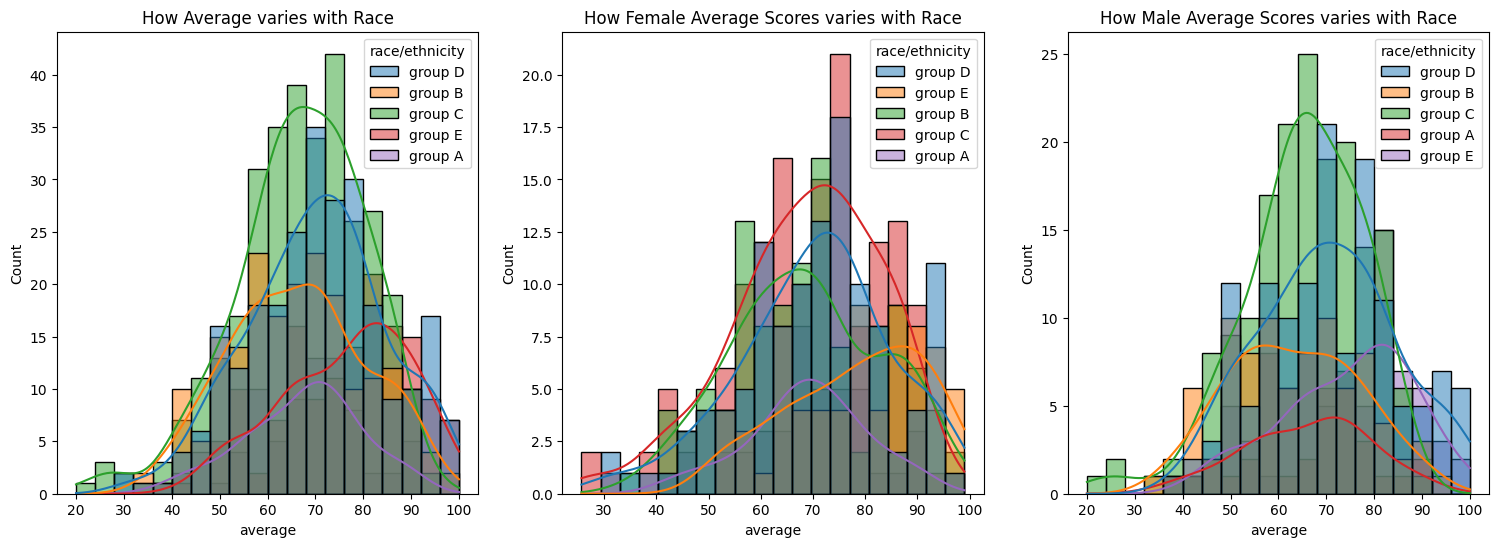

In [121]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, bins=20, hue='race/ethnicity')
plt.title("How Average varies with Race")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', bins=20, kde=True, hue='race/ethnicity')
plt.title("How Female Average Scores varies with Race")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', bins=20, kde=True, hue='race/ethnicity')
plt.title("How Male Average Scores varies with Race")
plt.show()

Students of group A and E tend to perform poorly in exams be it male or female.

Text(0.5, 1.0, 'How Average varies with Race')

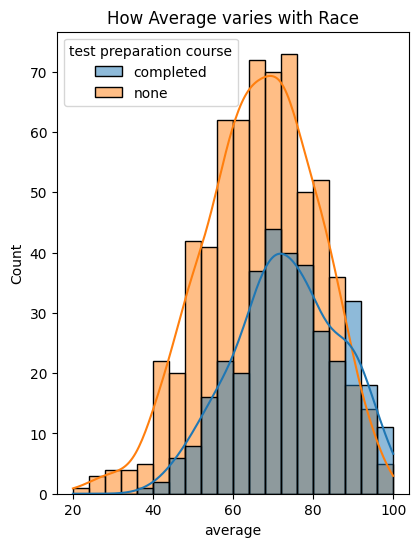

In [188]:
plt.subplots(1,1, figsize=(10,6))
plt.subplot(121)
sns.histplot(data=df, x='average', kde=True, bins=20, hue='test preparation course')
plt.title("How Average varies with Race")

In [ ]:
maths_less_20=(df['math score']<=20).sum()
reading_less_20=df[df['reading score']<=20]['average'].count() 
writing_less_20=(df['writing score']<=20).sum()

print('Number of students with marks less than 20 in Maths: ',maths_less_20)
print('Number of students with marks less than 20 in Reading: ',reading_less_20)
print('Number of students with marks less than 20 in Writing: ',writing_less_20)


Number of students with marks less than 20 in Maths:  2
Number of students with marks less than 20 in Reading:  0
Number of students with marks less than 20 in Writing:  2


Text(0.5, 1.0, 'WRITING SCORES')

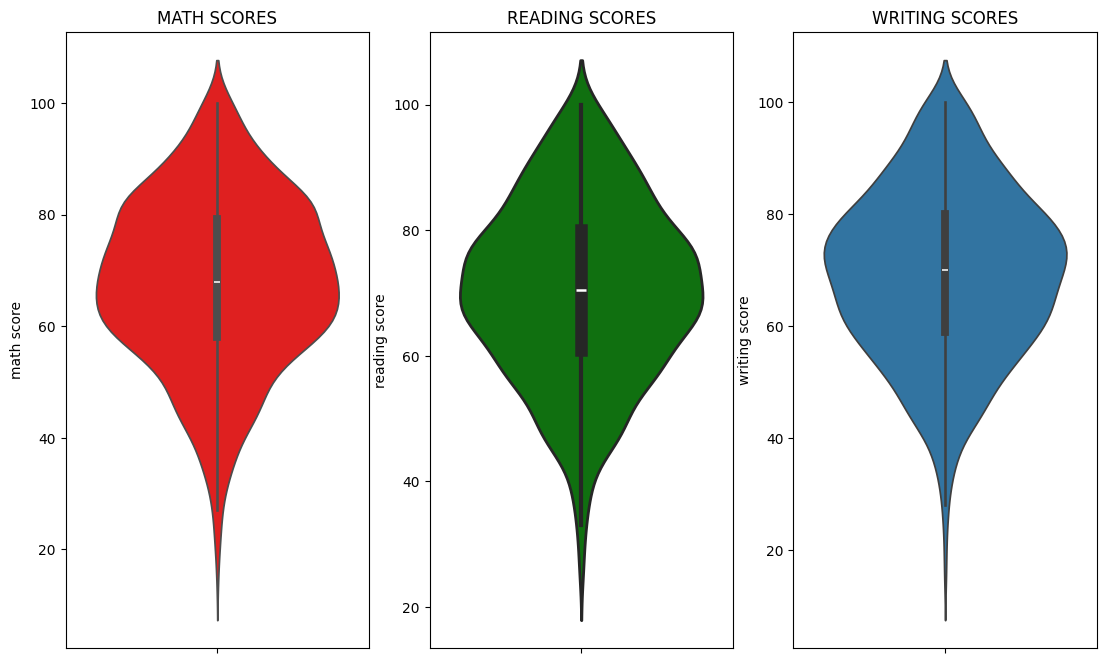

In [195]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(141)
sns.violinplot(data=df, y='math score', color='red')
plt.title('MATH SCORES')

plt.subplot(142)
sns.violinplot(data=df, y='reading score', color='green', linewidth=2)
plt.title('READING SCORES')

plt.subplot(143)
sns.violinplot(data=df, y='writing score')
plt.title('WRITING SCORES')

From the above three plots its clearly visible that most of the students score in between 50-80 in Maths whereas in reading and writing most of them score from 60-80

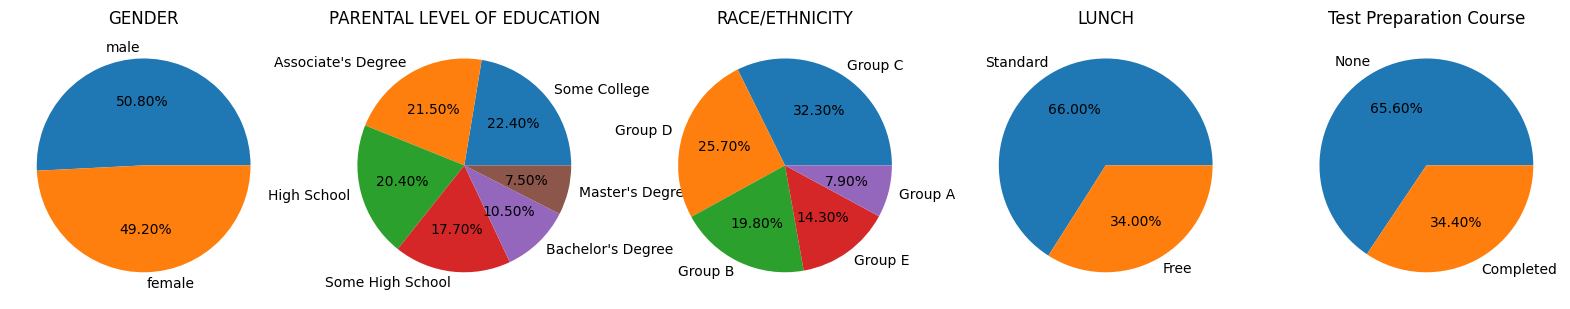

In [196]:
plt.subplots(1,5,figsize=(20,20))

plt.subplot(151)
plt.pie(df['gender'].value_counts(),labels=['male','female'],autopct='%1.2f%%')
plt.title('GENDER')

plt.subplot(152)
plt.pie(df['parental level of education'].value_counts(),labels=['Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"],autopct='%1.2f%%')
plt.title("PARENTAL LEVEL OF EDUCATION")

plt.subplot(153)
plt.pie(df['race/ethnicity'].value_counts(),labels=['Group C', 'Group D','Group B','Group E','Group A'],autopct='%1.2f%%')
plt.title("RACE/ETHNICITY")

plt.subplot(154)
plt.pie(df['lunch'].value_counts(),labels=['Standard', 'Free'],autopct='%1.2f%%')
plt.title("LUNCH")

plt.subplot(155)
plt.pie(df['test preparation course'].value_counts(),labels=['None', 'Completed'],autopct='%1.2f%%')
plt.title("Test Preparation Course")

plt.grid()
plt.show()



- male and female student proportion is almost same
- Number of students whose parental education is from some college are highest followed closely by Associate's degree.
- Number of students are highest in group C
- Number of students who have standard lunch are higher.
- Number of students who have not enrolled in any test preparation course is highest with 65% 

# Univariate Analysis

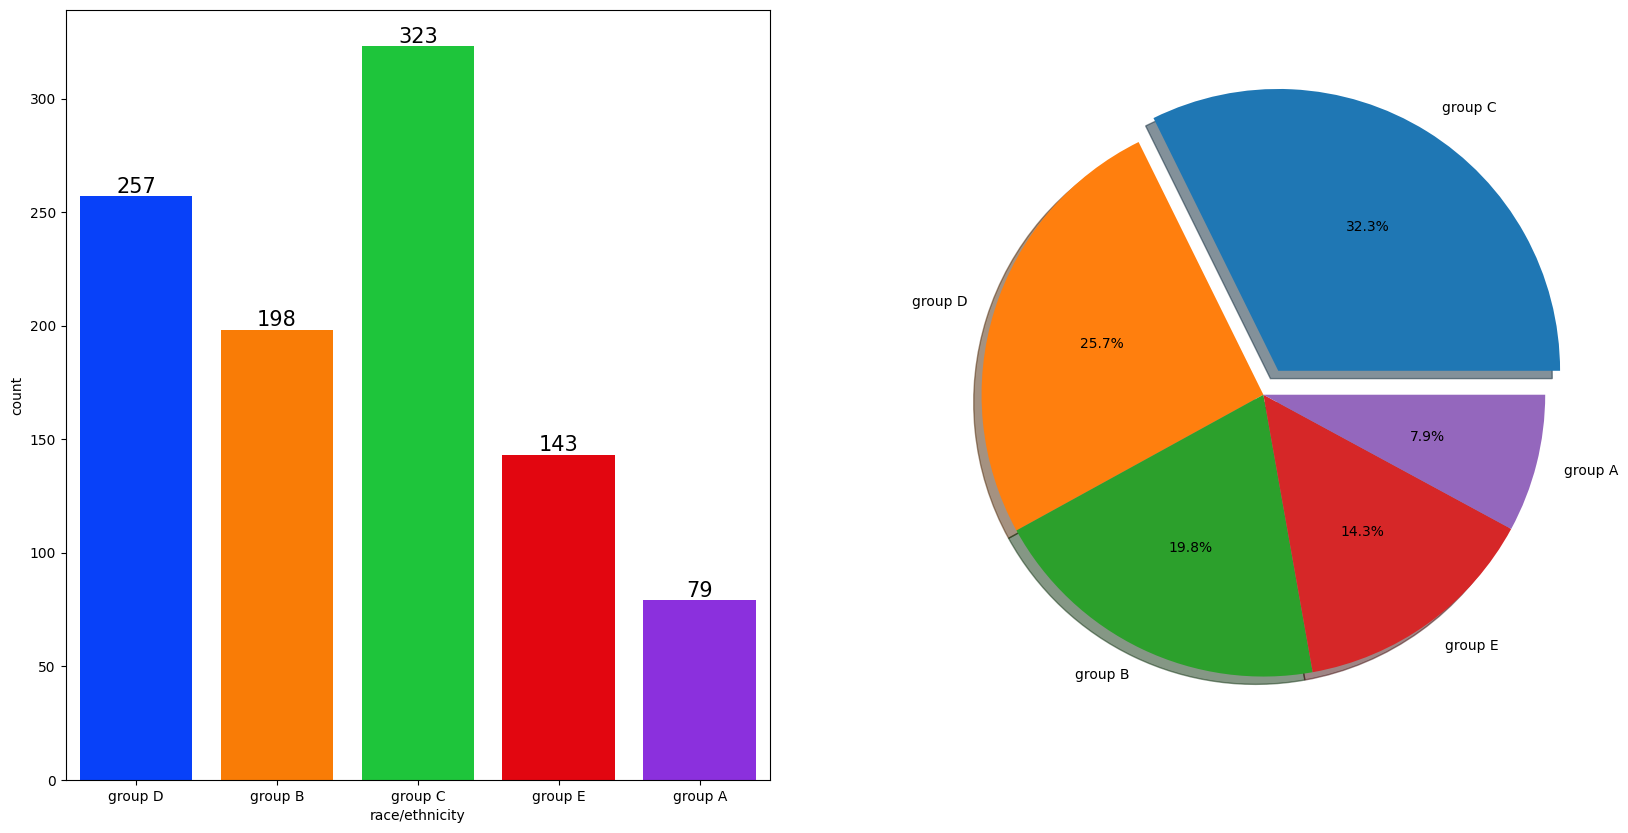

In [197]:
f,ax=plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
plt.subplot(122)
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

Most students are from group C/D

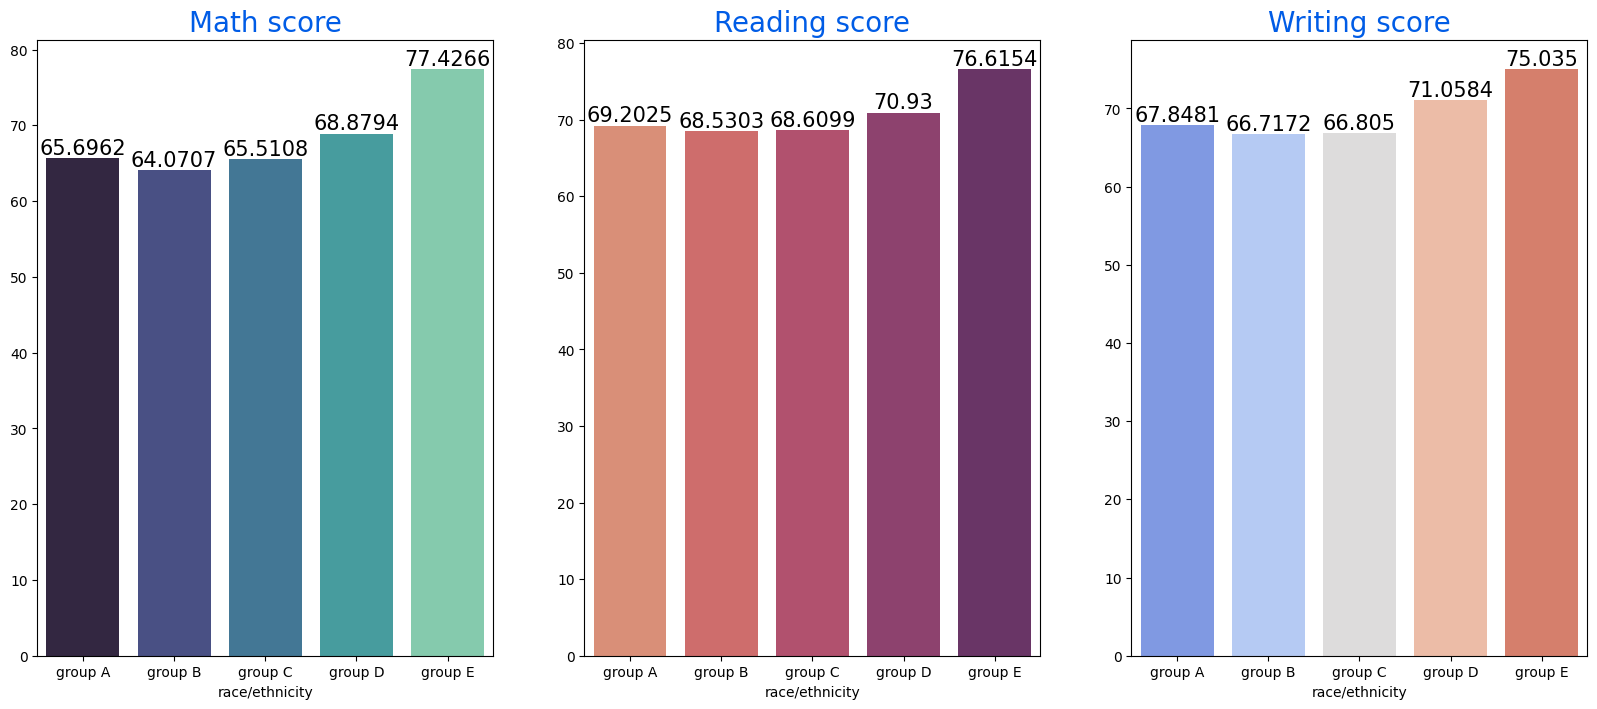

In [206]:

Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Group E performs best in all 3 subjects followed by group D, with group B performing the least.

Text(0.5, 1.0, 'WRITING SCORES')

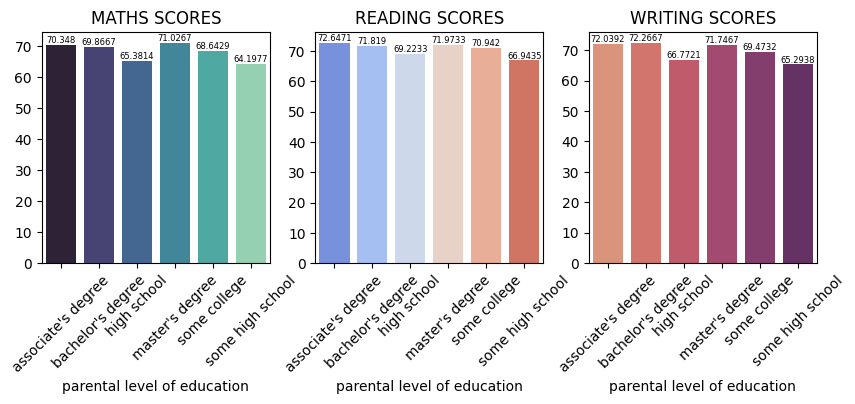

In [242]:
Group_data_par=df.groupby('parental level of education')
fg,ax=plt.subplots(1,3,figsize=(10,3))

sns.barplot(y=Group_data_par['math score'].mean().values, x=Group_data_par['math score'].mean().index, palette='mako',ax=ax[0])
for i in ax[0].containers:
    ax[0].bar_label(i, size=6)
ax[0].set_title("MATHS SCORES")
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(y=Group_data_par['reading score'].mean().values, x=Group_data_par['reading score'].mean().index, palette='coolwarm',ax=ax[1])
for i in ax[1].containers:
    ax[1].bar_label(i, size=6)
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title("READING SCORES")

sns.barplot(y=Group_data_par['writing score'].mean().values, x=Group_data_par['writing score'].mean().index, palette='flare',ax=ax[2])
for i in ax[2].containers:
    ax[2].bar_label(i, size=6)
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title("WRITING SCORES")

The score of student whose parents possess master and associate's degree are higher than others.

<Axes: xlabel='lunch', ylabel='writing score'>

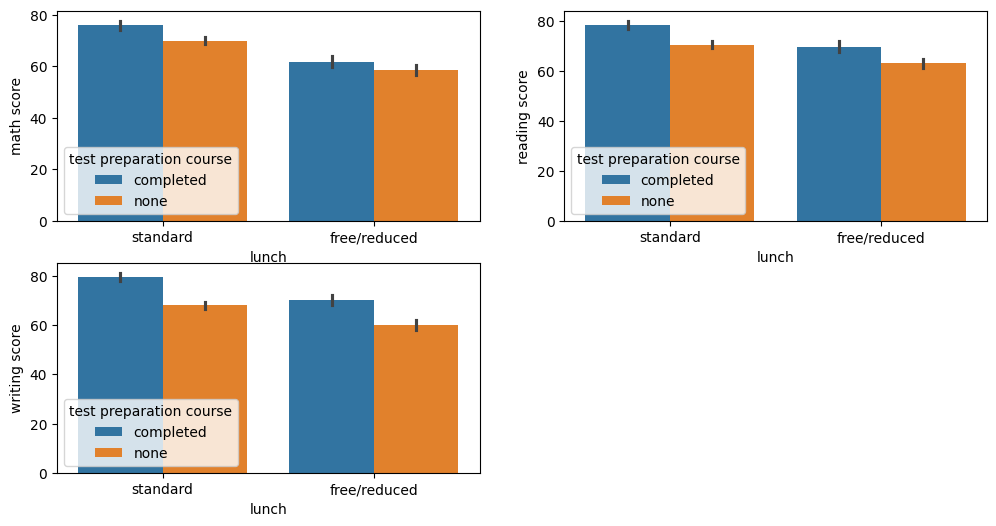

In [245]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

Checking outliers

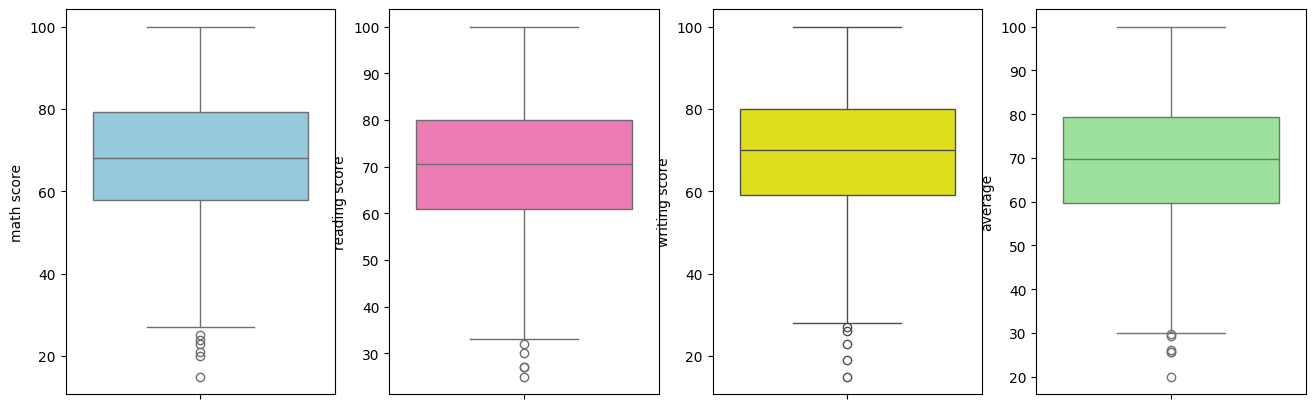

In [244]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

# Conclusion

- Student's performance depends upon race, Lunch, Parental education.